In [1]:
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation, FFMpegWriter 
import plots 
plots.mpltoolkit.load_mpl_presets() 
import numpy as np 
import vice 
import sys 
sys.path.append("../") 
import src 

/Users/astrobeard/anaconda3/lib/python3.7/site-packages/vice/core/outputs/output.py:131: UserWarning: agb n yield not encoded with output. Assuming the current yield setting, which may not reflect the yield setting at the time the simulation was ran.
  self.__c_version = c_output(name)


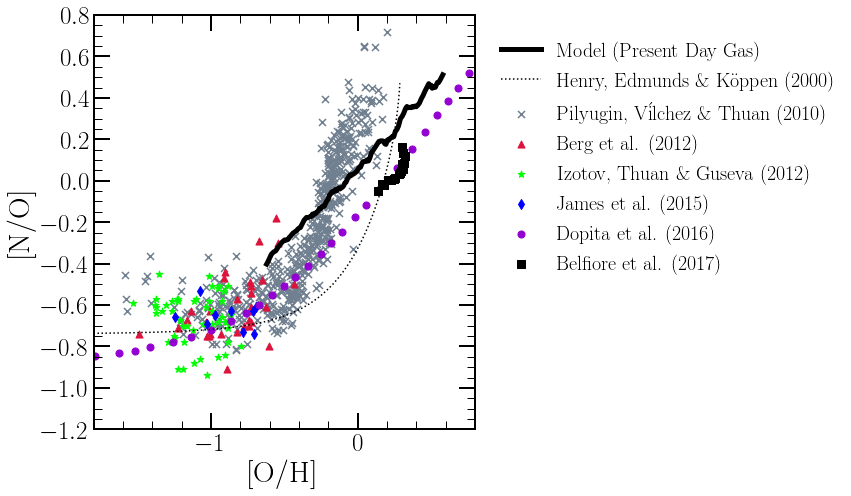

In [3]:
fig = plt.figure(figsize = (12, 7), facecolor = "white") 
ax = fig.add_subplot(111) 
ax.set_xlabel("[O/H]") 
ax.set_ylabel("[N/O]") 
ax.set_xlim([-1.8, 0.8]) 
ax.set_ylim([-1.2, 0.8])
# ax.set_ylim([-0.75, 0.75]) 
ax.set_yticks([-1.2 + 0.2 * _ for _ in range(11)]) 
zones = ["zone%d" % (_) for _ in range(20, 155)] 
diffusion = vice.output("../outputs/diffusion/insideout") 
diffusion_oh = [diffusion.zones[_].history["[o/h]"][-1] for _ in zones] 
diffusion_no = [diffusion.zones[_].history["[n/o]"][-1] for _ in zones] 
ax.plot(diffusion_oh, diffusion_no, c = plots.mpltoolkit.named_colors()["black"], 
    label = "Model (Present Day Gas)", zorder = 1000, linewidth = 5) 
pilyugin2010 = src.data.read("pilyugin2010") 
kwargs = {
    "c": plots.mpltoolkit.named_colors()["slategray"], 
    "marker": plots.mpltoolkit.markers()["x"], 
    "label": r"Pilyugin, V$\acute{\text{i}}$lchez \& Thuan (2010)", 
    "s": 50 
}
ax.scatter(pilyugin2010["[o/h]"], pilyugin2010["[n/o]"], **kwargs) 
berg2012 = src.data.read("berg2012") 
kwargs["c"] = plots.mpltoolkit.named_colors()["crimson"] 
kwargs["marker"] = plots.mpltoolkit.markers()["triangle_up"] 
kwargs["label"] = "Berg et al. (2012)" 
# kwargs = {
#     "xerr": berg2012["err_[o/h]"], 
#     "yerr": berg2012["err_[n/o]"], 
#     "c": plots.mpltoolkit.named_colors()["crimson"], 
#     "linestyle": "None", 
#     "label": "Berg et al. (2012)" 
# }
# ax.errorbar(berg2012["[o/h]"], berg2012["[n/o]"], **kwargs) 
ax.scatter(berg2012["[o/h]"], berg2012["[n/o]"], **kwargs) 
izotov2012 = src.data.read("izotov2012") 
# kwargs["xerr"] = izotov2012["err_[o/h]"] 
# kwargs["yerr"] = izotov2012["err_[n/o]"] 
kwargs["c"] = plots.mpltoolkit.named_colors()["lime"] 
kwargs["marker"] = plots.mpltoolkit.markers()["star"] 
kwargs["label"] = "Izotov, Thuan \& Guseva (2012)" 
# ax.errorbar(izotov2012["[o/h]"], izotov2012["[n/o]"], **kwargs) 
ax.scatter(izotov2012["[o/h]"], izotov2012["[n/o]"], **kwargs) 
james2015 = src.data.read("james2015") 
# kwargs["xerr"] = james2015["err_[o/h]"] 
# kwargs["yerr"] = james2015["err_[n/o]"] 
kwargs["c"] = plots.mpltoolkit.named_colors()["blue"] 
kwargs["marker"] = plots.mpltoolkit.markers()["thin_diamond"] 
kwargs["label"] = "James et al. (2015)" 
# ax.errorbar(james2015["[o/h]"], james2015["[n/o]"], **kwargs) 
ax.scatter(james2015["[o/h]"], james2015["[n/o]"], **kwargs) 
dopita2016 = src.data.read("dopita2016") 
kwargs["c"] = plots.mpltoolkit.named_colors()["darkviolet"] 
kwargs["marker"] = plots.mpltoolkit.markers()["circle"] 
kwargs["label"] = "Dopita et al. (2016)" 
ax.scatter(dopita2016["[o/h]"], dopita2016["[n/o]"], **kwargs) 
belfiore2017 = src.data.read("belfiore2017") 
# kwargs["xerr"] = belfiore2017["err_[o/h]"] 
# kwargs["yerr"] = belfiore2017["err_[n/o]"] 
kwargs["c"] = plots.mpltoolkit.named_colors()["black"] 
kwargs["marker"] = plots.mpltoolkit.markers()["square"] 
kwargs["label"] = "Belfiore et al. (2017)" 
# ax.errorbar(belfiore2017["[o/h]"], belfiore2017["[n/o]"], **kwargs) 
ax.scatter(belfiore2017["[o/h]"], belfiore2017["[n/o]"], **kwargs) 
henry2000 = src.no_oh_relation.Henry2000() 
xvals = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 1000) 
yvals = [henry2000(_) for _ in xvals] 
ax.plot(xvals, yvals, c = plots.mpltoolkit.named_colors()["black"], 
    linestyle = ':', label = r"Henry, Edmunds \& K$\ddot{\text{o}}$ppen (2000)") 

kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("upper left"), 
    "ncol": 1, 
    "frameon": False, 
    "fontsize": 20, 
    "bbox_to_anchor": (1.02, 0.98) 
} 
ax.legend(**kwargs) 
plt.tight_layout() 
for ext in ["pdf", "png"]: plt.savefig("multizone/no_oh_relation.%s" % (ext)) 

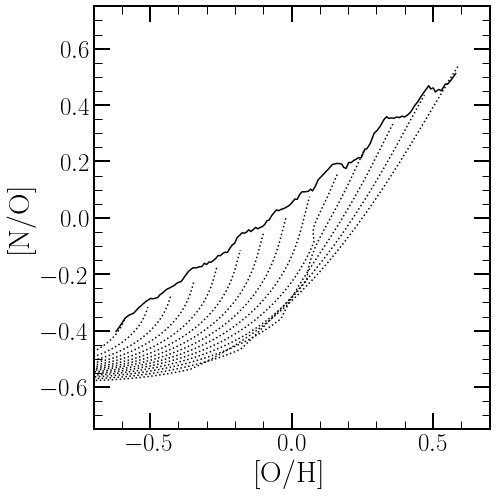

In [6]:
fig = plt.figure(figsize = (7, 7), facecolor = "white") 
ax = fig.add_subplot(111) 
ax.set_xlabel("[O/H]") 
ax.set_ylabel("[N/O]") 
ax.set_xlim([-0.7, 0.7]) 
ax.set_ylim([-0.75, 0.75]) 
ax.set_yticks([-0.6 + 0.2 * _ for _ in range(7)]) 
zones = ["zone%d" % (_) for _ in range(20, 155)] 
diffusion = vice.output("../outputs/diffusion/insideout") 
postprocess = vice.output("../outputs/post-process/insideout")
diffusion_oh = [diffusion.zones[_].history["[o/h]"][-1] for _ in zones] 
diffusion_no = [diffusion.zones[_].history["[n/o]"][-1] for _ in zones] 
ax.plot(diffusion_oh, diffusion_no, c = plots.mpltoolkit.named_colors()["black"]) 
zones = ["zone%d" % (_) for _ in range(20, 151, 10)]  
for zone in zones: 
    oh = postprocess.zones[zone].history["[o/h]"] 
    no = postprocess.zones[zone].history["[n/o]"] 
    ax.plot(oh, no, c = plots.mpltoolkit.named_colors()["black"], linestyle = ':') 
plt.tight_layout() 
for ext in ["pdf", "png"]: plt.savefig("multizone/no_oh_tracks.%s" % (ext)) 

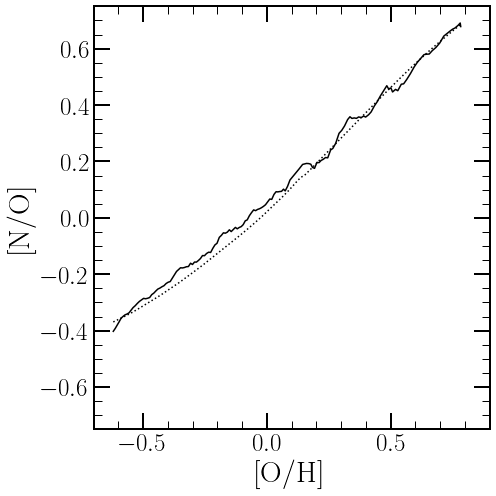

In [9]:
fig = plt.figure(figsize = (7, 7), facecolor = "white") 
ax = fig.add_subplot(111) 
# ax2 = fig.add_subplot(122, sharey = ax1) 
# for ax in [ax1, ax2]: 
ax.set_xlabel("[O/H]") 
ax.set_xlim([-0.7, 0.9]) 
ax.set_ylim([-0.75, 0.75]) 
ax.set_yticks([-0.6 + 0.2 * _ for _ in range(7)])
# ax1.set_title("Diffusion", fontsize = 25) 
# ax2.set_title("Post-Process", fontsize = 25) 
ax.set_ylabel("[N/O]") 
# plt.setp(ax2.get_yticklabels(), visible = False) 
diffusion = vice.output("../outputs/diffusion/insideout") 
postprocess = vice.output("../outputs/post-process/insideout") 
zones = ["zone%d" % (_) for _ in range(3, 155)] 
diffusion_oh = [diffusion.zones[_].history["[o/h]"][-1] for _ in zones] 
diffusion_no = [diffusion.zones[_].history["[n/o]"][-1] for _ in zones] 
postprocess_oh = [postprocess.zones[_].history["[o/h]"][-1] for _ in zones] 
postprocess_no = [postprocess.zones[_].history["[n/o]"][-1] for _ in zones] 
ax.plot(diffusion_oh, diffusion_no, c = plots.mpltoolkit.named_colors()["black"]) 
ax.plot(postprocess_oh, postprocess_no, c = plots.mpltoolkit.named_colors()["black"], 
    linestyle = ':') 
plt.tight_layout() 
plt.subplots_adjust(wspace = 0) 

/Users/astrobeard/anaconda3/lib/python3.7/site-packages/vice/core/outputs/output.py:131: UserWarning: agb n yield not encoded with output. Assuming the current yield setting, which may not reflect the yield setting at the time the simulation was ran.
  self.__c_version = c_output(name)


T = 13.20 Gyr
T = 13.20 Gyr


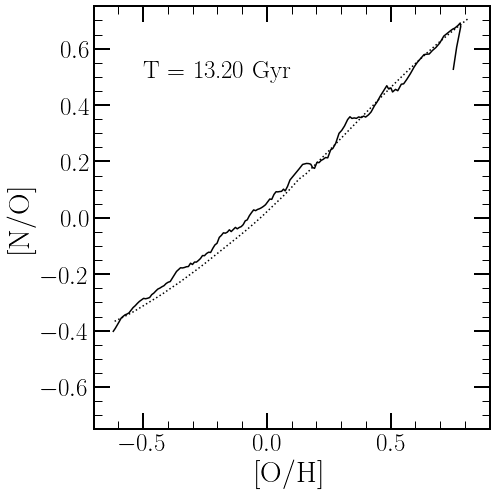

In [13]:
fig = plt.figure(figsize = (7, 7), facecolor = "white") 
ax = fig.add_subplot(111) 
ax.set_xlabel("[O/H]") 
ax.set_xlim([-0.7, 0.9]) 
ax.set_ylim([-0.75, 0.75]) 
ax.set_yticks([-0.6 + 0.2 * _ for _ in range(7)])
ax.set_ylabel("[N/O]") 
plot_kwargs = {"c": plots.mpltoolkit.named_colors()["black"]} 
ln1 = ax.plot([], [], linestyle = '-', **plot_kwargs)[0] 
ln2 = ax.plot([], [], linestyle = ':', **plot_kwargs)[0] 
plt.tight_layout() 
plt.subplots_adjust(wspace = 0) 
timestamp = ax.text(-0.5, 0.5, "T = 0.00 Gyr", fontsize = 25) 
diffusion = vice.output("../outputs/diffusion/insideout") 
postprocess = vice.output("../outputs/post-process/insideout") 
zones = ["zone%d" % (_) for _ in range(155)] 
diffusion_oh = [diffusion.zones[_].history["[o/h]"] for _ in zones] 
diffusion_no = [diffusion.zones[_].history["[n/o]"] for _ in zones] 
postprocess_oh = [postprocess.zones[_].history["[o/h]"] for _ in zones] 
postprocess_no = [postprocess.zones[_].history["[n/o]"] for _ in zones] 

def init(): 
    return [ln1, ln2] 

def update(frame): 
    time = "T = %.2f Gyr" % (diffusion.zones["zone0"].history["time"][frame]) 
    sys.stdout.write("\r%s" % (time)) 
    sys.stdout.flush() 
    timestamp.set_text(time) 
    diffusion_xvals = [diffusion_oh[_][frame] for _ in range(len(zones))] 
    diffusion_yvals = [diffusion_no[_][frame] for _ in range(len(zones))] 
    postprocess_xvals = [postprocess_oh[_][frame] for _ in range(len(zones))] 
    postprocess_yvals = [postprocess_no[_][frame] for _ in range(len(zones))] 
    ln1.set_data(diffusion_xvals, diffusion_yvals) 
    ln2.set_data(postprocess_xvals, postprocess_yvals) 
    return [ln1, ln2] 

ani = FuncAnimation(fig, update, frames = len(diffusion.zones["zone0"].history["time"]), 
    init_func = init, blit = True, interval = 10, repeat_delay = 1000) 
writer = FFMpegWriter(fps = 100) 
for ext in ["mp4", "gif"]: 
    ani.save("no_oh_tracks.%s" % (ext), writer = writer) 
    sys.stdout.write("\n") 

In [11]:
import os 
os.getcwd() 

'/Users/astrobeard/Work/Research/galchem/AGBmigration/notebooks'

/Users/astrobeard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


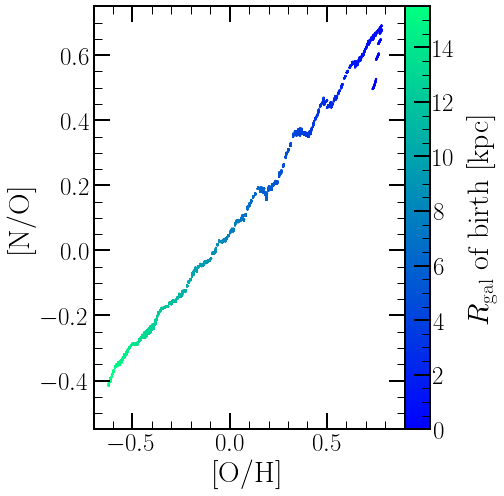

In [24]:
fig = plt.figure(figsize = (7, 7), facecolor = "white") 
ax = fig.add_subplot(111) 
ax.set_xlabel("[O/H]") 
ax.set_ylabel("[N/O]") 
ax.set_xlim([-0.7, 0.9]) 
ax.set_ylim([-0.55, 0.75]) 
ax.set_yticks([-0.4 + 0.2 * _ for _ in range(6)]) 
out = vice.output("../outputs/diffusion/insideout") 
stars = out.stars.filter("zone_origin", "<=", 154).filter("age", "<=", 0.5) 
kwargs = {
    "s": 1, 
    "c": [0.1 * (_ + 0.5) for _ in stars["zone_origin"]], 
    "cmap": plt.get_cmap("winter"), 
    "vmin": 0, 
    "vmax": 15.5 
}
sc = ax.scatter(stars["[o/h]"], stars["[n/o]"], **kwargs) 
cbar_ax = fig.add_axes([0.92, 0.05, 0.02, 0.95]) 
cbar = plt.colorbar(sc, cax = cbar_ax, pad = 0, orientation = "vertical") 
cbar.set_label(r"$R_\text{gal}$ of birth [kpc]", labelpad = 10) 
cbar.set_ticks(range(0, 16, 2)) 
plt.tight_layout() 
plt.subplots_adjust(right = 0.81) 
cbar_ax.set_position([
    ax.get_position().x1, 
    ax.get_position().y0, 
    0.05, 
    ax.get_position().y1 - ax.get_position().y0 
])
for ext in ["pdf", "png"]: plt.savefig("no_oh_youngstars.%s" % (ext)) 

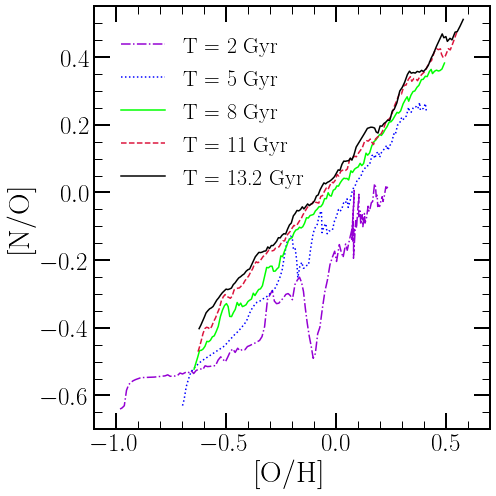

In [19]:
fig = plt.figure(figsize = (7, 7), facecolor = "white") 
ax = fig.add_subplot(111, facecolor = "white") 
ax.set_xlabel("[O/H]") 
ax.set_ylabel("[N/O]") 
ax.set_xlim([-1.1, 0.7]) 
ax.set_ylim([-0.7, 0.55])
times = [2, 5, 8, 11, 13.2] 
colors = ["darkviolet", "blue", "lime", "crimson", "black"] 
linestyles = ['-.', ':', '-', '--', '-'] 
diffusion = vice.output("../outputs/diffusion/insideout") 
zones = ["zone%d" % (_) for _ in range(20, 155)] 
for i in range(len(times)): 
    idx = diffusion.zones["zone0"].history["time"].index(times[i]) 
    oh = [diffusion.zones[zone].history["[o/h]"][idx] for zone in zones] 
    no = [diffusion.zones[zone].history["[n/o]"][idx] for zone in zones] 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "linestyle": linestyles[i], 
        "label": "T = %g Gyr" % (times[i]) 
    } 
    ax.plot(oh, no, **kwargs) 
kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("upper left"), 
    "ncol": 1, 
    "frameon": False, 
    "bbox_to_anchor": (0.02, 0.98), 
    "fontsize": 22 
}
ax.legend(**kwargs) 
plt.tight_layout() 